In [20]:
import os
import pandas as pd

In [2]:
data_dir = "movie_reviews"

In [22]:
%matplotlib inline

In [3]:
os.path.exists(data_dir)

True

In [4]:
documents, labels = [], []

for movie_id in os.listdir(data_dir):
    for file_name in os.listdir(os.path.join(data_dir, movie_id)):
        file_path = os.path.join(data_dir, movie_id, file_name)
        with open(file_path, encoding='utf8') as f:
            labels.append(next(f))
            documents.append(f.read())

In [30]:
n = 10000

In [31]:
documents2 = documents[:n]

In [33]:
labels2 = labels[:n]

In [34]:
print(documents2[0])

A Nutshell Review: The Bank Job

If I remember it rightly, the very first time I saw Jason Statham star
in a movie, it was in Guy Ritchie's Snatch, and since then he's had his
fair share of crime capers ranging from the remake of The Italian Job
where he starred as Handsome Rob, to mindless, high octane action
movies like The Transporter series where he's the star vehicle (pardon
the pun). While these movies can't possible earn him any action awards,
you can't deny the fact that this guy's pretty charismatic in his own
right, and I've no qualms about watching him play characters on either
side of the fence, taking on his opponents in Crank or War, holding his
own opposite Jet Li.While we await for the next installment of The Transporter or Crank, or
The Brazilian Job, his The Bank Job sure took longer than expected to
make its way to our shores, where the DVD should be released later this
week. But as always, I'd recommend to watch this bank caper on the big
screen. Don't expect plenty

In [35]:
labels2 = [int(x) for x in labels2]

In [36]:
labels2[0]

9

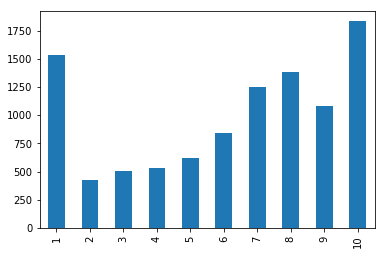

In [37]:
pd.Series(labels2).value_counts().sort_index().plot.bar()

In [38]:
labels_binary = ["positive" if l >= 7 else "negative" for l in labels2]

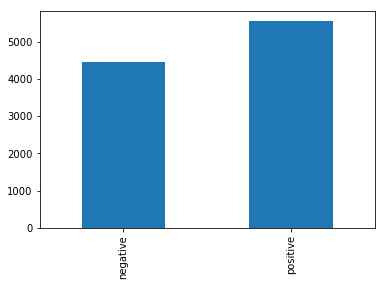

In [39]:
pd.Series(labels_binary).value_counts().sort_index().plot.bar()

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
vec = CountVectorizer(min_df=3, max_df=0.8)

In [42]:
documents_t = vec.fit_transform(documents2)

In [43]:
documents_t.shape

(10000, 23968)

In [44]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [45]:
logreg = LogisticRegression()

In [46]:
logreg.fit(documents_t, labels_binary)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
labels2[0]

9

In [54]:
x = vec.transform([documents2[0]])

In [59]:
vec.get_feature_names()[1871]

'bank'

In [53]:
logreg.predict(x)

array(['positive'],
      dtype='<U8')

In [62]:
logreg.predict(vec.transform(["nicolas cage"]))

array(['positive'],
      dtype='<U8')

In [71]:
from sklearn.pipeline import make_pipeline

In [72]:
model = make_pipeline(vec, logreg)

In [73]:
model.fit(documents2, labels_binary)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.8, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [76]:
model.predict_proba(["hitler"])

array([[ 0.59074639,  0.40925361]])

In [77]:
import re

In [83]:
re_cap = re.compile("(?:(?<=^)|(?<=[.!?:] ))[A-Z]")

In [88]:
re_cap.sub(lambda x: x.group().lower(), "Windows is good Nicolas Cage. Peter is a boy.")

'windows is good Nicolas Cage. peter is a boy.'

In [89]:
class MyTransformer:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [re_cap.sub(lambda x: x.group().lower(), x) for x in X]
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [ ]:
class MyTransformer2:
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return [re_cap.sub(lambda x: x.group().lower(), x) for x in X]
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [90]:
t = MyTransformer().fit_transform(["Windows is good Nicolas Cage. Peter is a boy."])

In [92]:
vec2 = CountVectorizer(min_df=3, max_df=0.8, lowercase=False)

In [93]:
model2 = make_pipeline(MyTransformer(), MyTransformer2(), vec2, logreg)

In [94]:
model2.fit(documents2, labels_binary)

Pipeline(memory=None,
     steps=[('mytransformer', <__main__.MyTransformer object at 0x0000026805F0FD68>), ('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.8, max_features=None, m...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [99]:
model2.predict_proba(["cage"])

array([[ 0.42025732,  0.57974268]])

In [101]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, make_scorer

In [102]:
accuracy_scorer = make_scorer(accuracy_score)

In [104]:
cross_val_score(model2, documents2, labels_binary, scoring=accuracy_scorer)

array([ 0.81973605,  0.82393521,  0.81962785])